# Titanic Passenger Survival Analysis

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from numpy import matmul
import os
warnings.filterwarnings('ignore')

In [4]:
#load the dataset
dataset = pd.read_csv(r"/Users/sushmithahs/Documents/NJIT_Course_Work/Fall 2022/Machine Learning/Project/titanic-datasets/train.csv")

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.shape

(891, 12)

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data visualisation

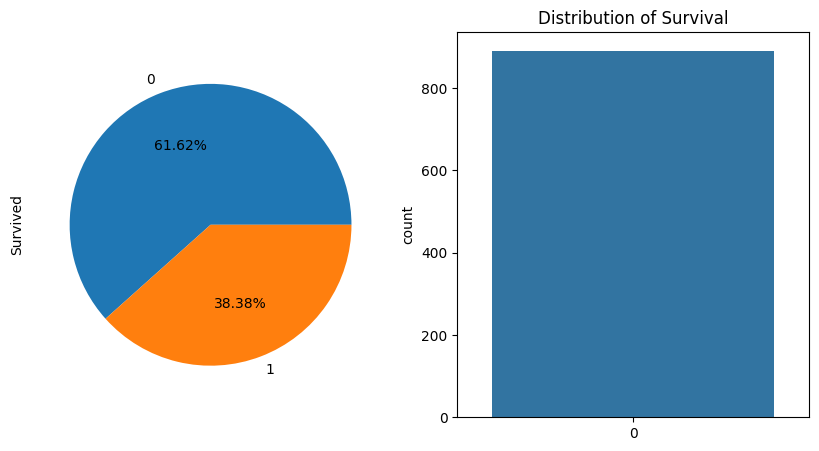

In [11]:
#Survived
plt.figure(figsize=(10,5))
plt.subplot(121)
dataset['Survived'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
sns.countplot(dataset['Survived'])
plt.title('Distribution of Survival')
plt.show()

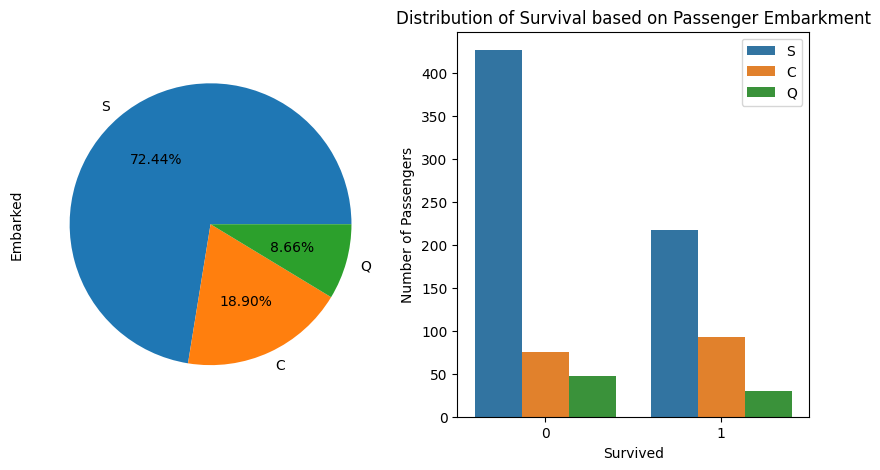

In [12]:
#Embarked
plt.figure(figsize=(10,5))
plt.subplot(121)
dataset['Embarked'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
sns.countplot(x = 'Survived',data = dataset,hue = 'Embarked')
plt.title('Distribution of Survival based on Passenger Embarkment')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

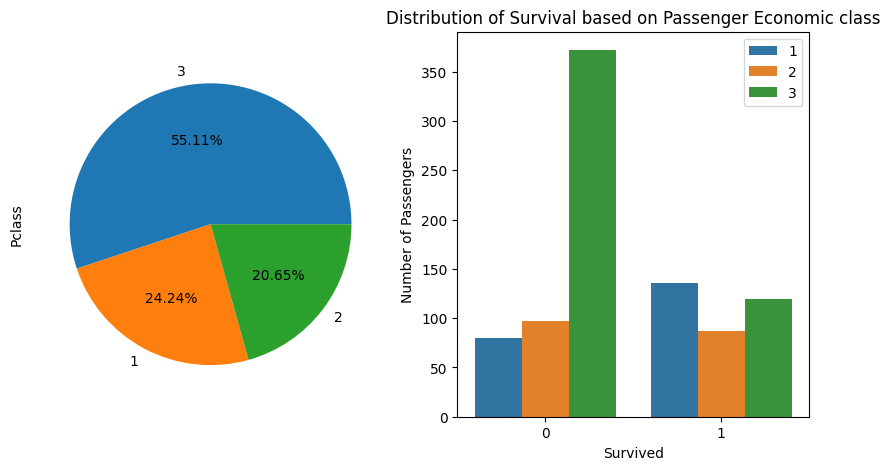

In [13]:
#Pclass
plt.figure(figsize=(10,5))
plt.subplot(121)
dataset['Pclass'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
sns.countplot(x='Survived', data = dataset, hue='Pclass')
plt.title('Distribution of Survival based on Passenger Economic class')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

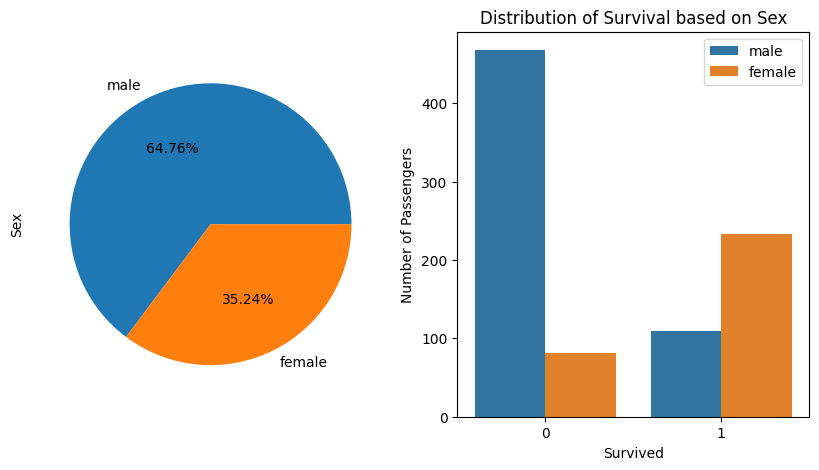

In [14]:
#Sex
plt.figure(figsize=(10,5))
plt.subplot(121)
dataset['Sex'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
sns.countplot(x='Survived', data = dataset, hue='Sex')
plt.title('Distribution of Survival based on Sex')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

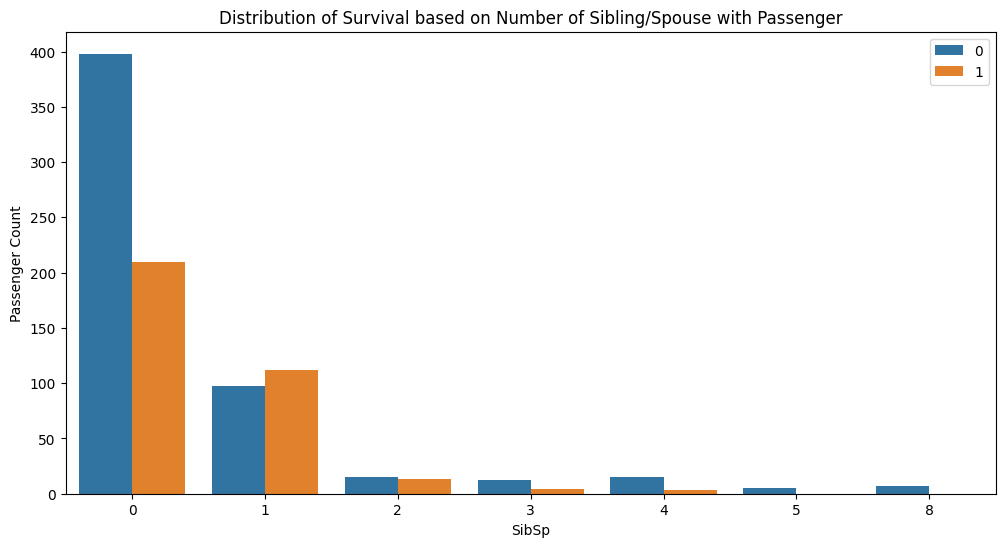

In [15]:
#SibSp
plt.figure(figsize=(12,6))
sns.countplot(x = 'SibSp',data = dataset,hue = 'Survived')
plt.title('Distribution of Survival based on Number of Sibling/Spouse with Passenger')
plt.xlabel('SibSp')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

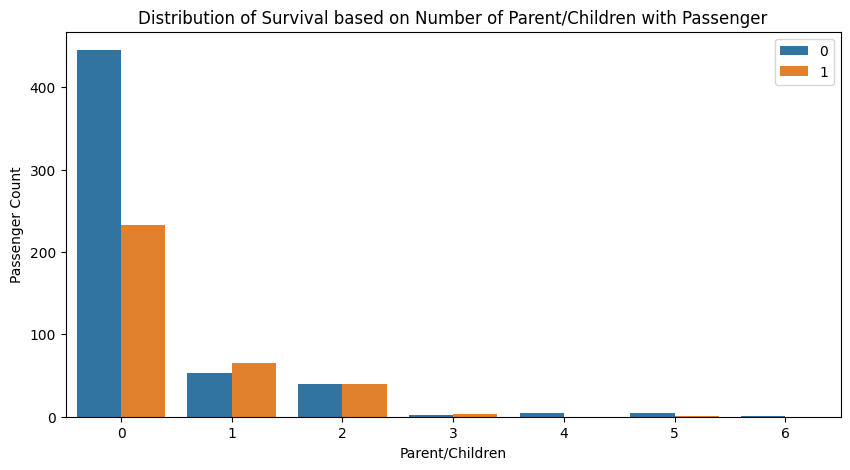

In [16]:
#Parch
plt.figure(figsize=(10,5))
sns.countplot(x = 'Parch',data = dataset,hue = 'Survived')
plt.title('Distribution of Survival based on Number of Parent/Children with Passenger')
plt.xlabel('Parent/Children')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

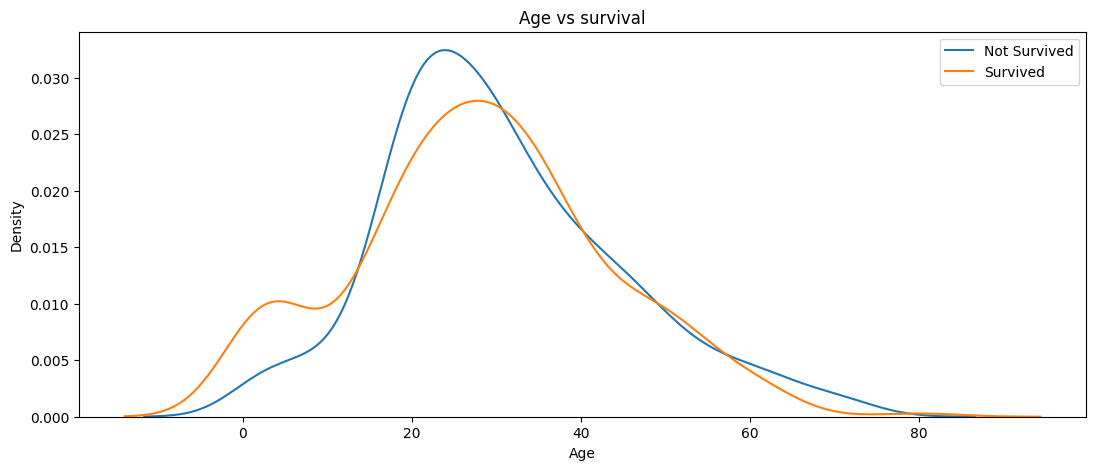

In [17]:
#Age
plt.figure(figsize=(13,5))
plt.title('Age vs survival')
sns.distplot(dataset['Age'][dataset['Survived']==0],bins=20,kde=True,hist=False)
sns.distplot(dataset['Age'][dataset['Survived']==1],bins=20,kde=True,hist=False)
plt.legend(labels=['Not Survived','Survived'])

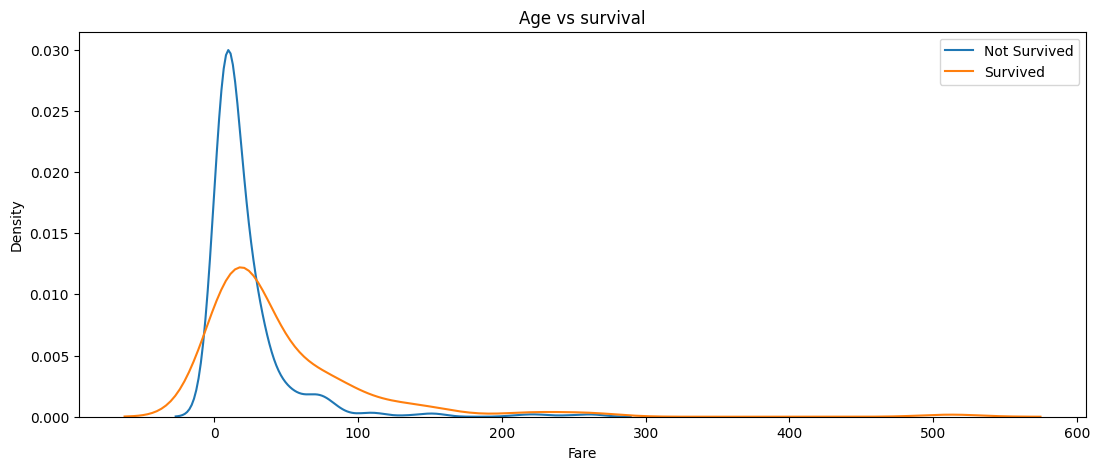

In [18]:
#Fare
plt.figure(figsize=(13,5))
plt.title('Age vs survival')
sns.distplot(dataset['Fare'][dataset['Survived']==0],bins=20,kde=True,hist=False)
sns.distplot(dataset['Fare'][dataset['Survived']==1],bins=20,kde=True,hist=False)
plt.legend(labels=['Not Survived','Survived'])

In [19]:
#Ticket
dataset['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [20]:
#Cabin
dataset['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [21]:
#Name
dataset['Name'].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [22]:
#PassengerId
dataset['PassengerId'].nunique()

891

#### Fare seems to vary with survival.

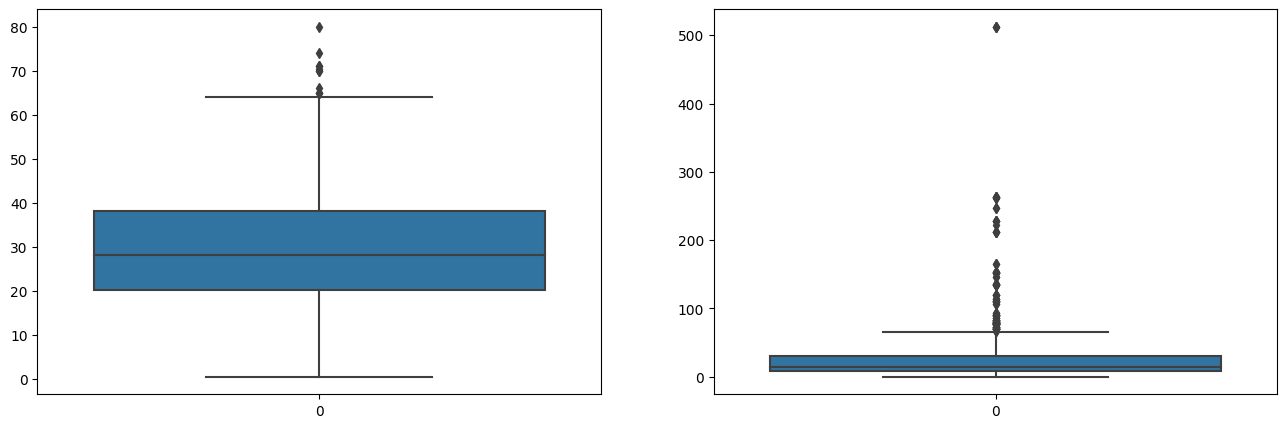

In [23]:
#Visualise outliers in the data
fig, ax = plt.subplots(1,2, figsize = (16,5))
col = ['Age', 'Fare']

for i in range(0,2):
    sns.boxplot(dataset[col[i]], ax=ax[i])

# Handling Missing Value 

In [24]:
#Percent of missing values in the dataset
round(dataset.isnull().sum()*100/dataset.shape[0],2) 

Total = dataset.isnull().sum()
Total_Percent = round(dataset.isnull().sum()*100/dataset.shape[0],2) 
missing_data = pd.concat([Total, Total_Percent], axis=1, keys=['Total Missing Values', 'Total_Percent'])
missing_data

,Total Missing Values,Total_Percent
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


#### Deleting columns which has more than 30% missing values

In [25]:
#Creating a copy of main dataset
dataset_1 = dataset.copy()

In [26]:
# Deleting Cabin variable (77% missing)
dataset_1.drop(['Cabin'], axis=1, inplace = True)

In [27]:
dataset_1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
#Embarked (replacing missing values by most frequent value)
dataset_1['Embarked'] = dataset_1['Embarked'].fillna(dataset_1['Embarked'].mode()[0])

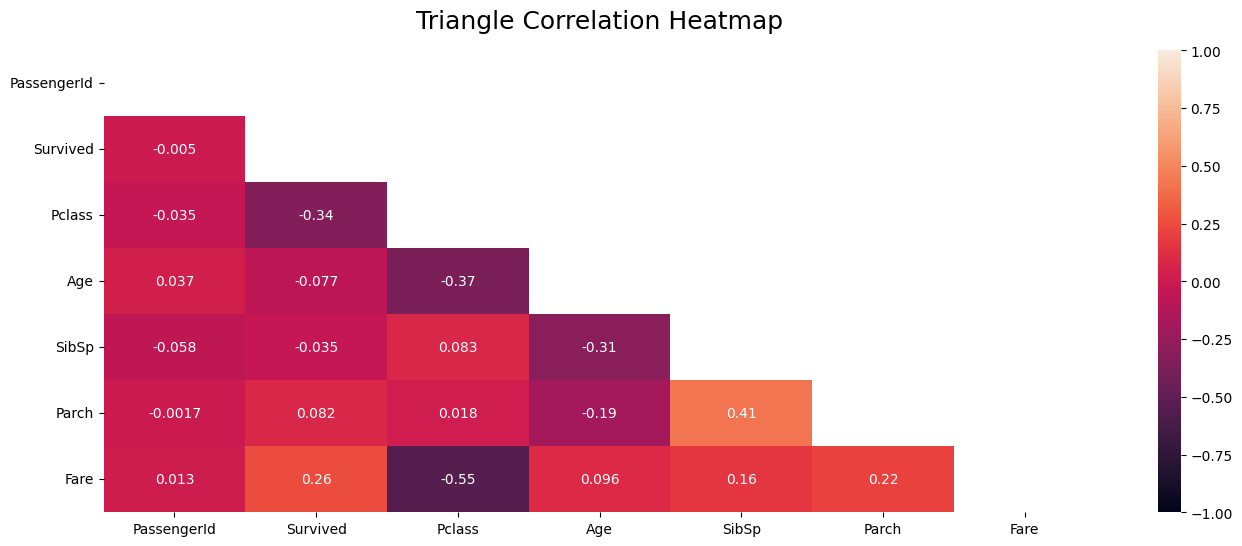

In [29]:
#Correlation
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset_1.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [30]:
Subs = dataset_1.groupby('Pclass',as_index=False)['Age'].median()
Subs

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [31]:
for i,row in dataset_1.iterrows():
    if(np.isnan(dataset_1['Age'][i])==True):
        if(dataset_1['Pclass'][i]==1):
            dataset_1['Age'][i] = Subs['Age'][0]
        elif(dataset_1['Pclass'][i]==2):
            dataset_1['Age'][i] = Subs['Age'][1]
        else:   
            dataset_1['Age'][i] = Subs['Age'][2]
            

# Binning

In [32]:
#Age
dataset_1['Age'] = pd.cut(x=dataset_1['Age'], bins=[0,18, 25, 35, 50,99],labels=[0,1,2,3,4])
dataset_1['Age'] = dataset_1['Age'].astype(int)
dataset_1['Age'].value_counts()

1    298
2    207
3    183
0    139
4     64
Name: Age, dtype: int64

In [33]:
#Fare
dataset_1['Fare'] = pd.qcut(dataset['Fare'], 4,labels=[0,1,2,3])
dataset_1['Fare'] = dataset_1['Fare'].astype(int)
dataset_1['Fare'].value_counts()

1    224
0    223
3    222
2    222
Name: Fare, dtype: int64

# New Features

In [34]:
#SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, 
#a person has on the Titanic.
dataset_1['Relatives'] = dataset_1['SibSp'] + dataset_1['Parch']

In [35]:
#Alone shows if someone is travelling alone or not 
dataset_1.loc[dataset_1['Relatives'] > 0, 'Alone'] = 0
dataset_1.loc[dataset_1['Relatives'] == 0, 'Alone'] = 1
dataset_1['Alone'] = dataset_1['Alone'].astype(int)

In [36]:
#Name feature to extract the titles from the Name
#Passenger status
dataset_1['Passenger_Status'] = dataset_1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#Cleaning passenger Passenger_Status
dataset_1['Passenger_Status'] = dataset_1['Passenger_Status'].replace('Ms', 'Miss')
dataset_1['Passenger_Status'] = dataset_1['Passenger_Status'].replace('Mlle', 'Miss')
dataset_1['Passenger_Status'] = dataset_1['Passenger_Status'].replace('Mme', 'Mrs')
dataset_1['Passenger_Status'] = dataset_1['Passenger_Status'].replace(['Dr', 'Major','Col','Don', 'Countess','Capt', 'Dona', 'Rev', 'Sir', 'Jonkheer','Lady'], 'Others')

# Feature Encoding

In [37]:
#Sex
Genders = {"male": 0, "female": 1}
dataset_1['Sex'] = dataset_1['Sex'].map(Genders)

#Embarked
Ports = {"S": 0, "C": 1, "Q": 2}
dataset_1['Embarked'] = dataset_1['Embarked'].map(Ports)

#Passenger_Status
Status = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Others": 4}
dataset_1['Passenger_Status'] = dataset_1['Passenger_Status'].map(Status)

# Deleting unwanted columns

In [38]:
#Dropping these variables because it has too many unique variables
dataset_2 = dataset_1.drop(['PassengerId','Name','Ticket'],axis=1) 

# Feature Importance

In [39]:
from sklearn.ensemble import RandomForestRegressor
train_dummies = pd.get_dummies(dataset_2)
df=train_dummies.drop(['Survived'], axis=1).copy()
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df,train_dummies.Survived)
dict(reversed(sorted(zip(np.round(model.feature_importances_,4), df.columns.values))))

{0.3636: 'Passenger_Status',
 0.1384: 'Pclass',
 0.1196: 'Sex',
 0.1004: 'Age',
 0.0991: 'Relatives',
 0.0683: 'Fare',
 0.0459: 'Embarked',
 0.0315: 'SibSp',
 0.0223: 'Parch',
 0.0109: 'Alone'}

# Modeling

In [40]:
#Spliting features and target
#Removing less importance variables like Parch, SibSp
X=dataset_2.drop(columns=['Survived','Parch','SibSp','Alone'])
y=dataset_2['Survived']

In [41]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

In [42]:
#Splitting into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [43]:
Result=pd.DataFrame(columns=['Name', 'train_accuracy', 'test_accuracy'])

In [44]:
def train_test_evaluate_model(model,name):
    global Result
    
    print(name)
    model.fit(X_train,y_train)
    train_score=model.score(X_train,y_train)
    print("Train Accuracy :",round(train_score,3))
    
    predict= model.predict(X_test)
    test_score=accuracy_score(y_test,predict)
    print("Test Accuracy :",round(test_score,3))
    
    print("Confusion Matrix of Test data:")
    confusion__matrix = pd.crosstab(y_test,predict , rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion__matrix, annot=True, fmt='g')
    plt.show()
    cm=confusion_matrix(y_test,predict)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    
    print("Precision : ",round((tp)/(tp+fp),3))
    print("Recall/TPR/Sensitivity : ",round((tp)/(tp+fn),3))
    
    
    new_row = {'Name':name, 'train_accuracy': round(train_score,3) , 'test_accuracy': round(test_score,3)}
    #append row to the dataframe
    Result = Result.append(new_row, ignore_index=True)

# Logistic Regression

In [45]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_val = [10, 1.0, 0.1,0.3,0.5 ,0.01]

# define grid search
grid = {'solver':solvers,'penalty':penalty,'C':c_val}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.830182 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression
Train Accuracy : 0.831
Test Accuracy : 0.789
Confusion Matrix of Test data:


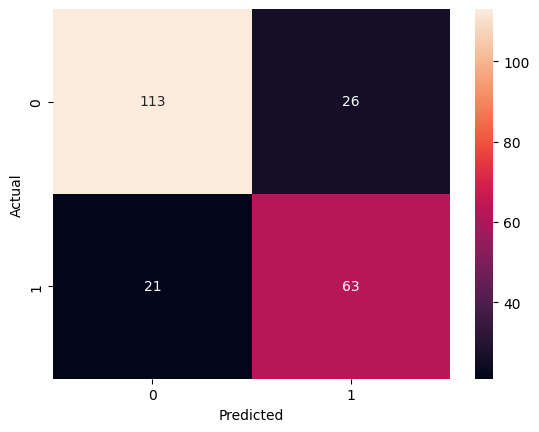

Precision :  0.708
Recall/TPR/Sensitivity :  0.75


In [46]:
train_test_evaluate_model(LogisticRegression(C= 0.1, penalty='l2', solver= 'liblinear'),"LogisticRegression")

# KNN

In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1,20,2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.833838 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


KNN
Train Accuracy : 0.841
Test Accuracy : 0.807
Confusion Matrix of Test data:


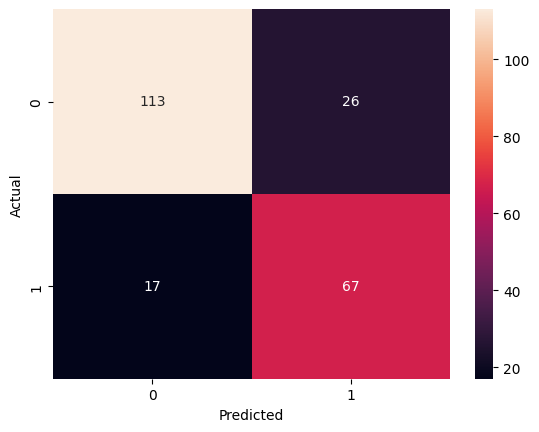

Precision :  0.72
Recall/TPR/Sensitivity :  0.798


In [48]:
train_test_evaluate_model(KNeighborsClassifier(metric='manhattan', n_neighbors= 19, weights= 'uniform'),"KNN")

# Random Forest

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# define grid search
grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [100,300,500,700]}

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

Best: 0.829357 using {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 700}


RandomForest
Train Accuracy : 0.864
Test Accuracy : 0.834
Confusion Matrix of Test data:


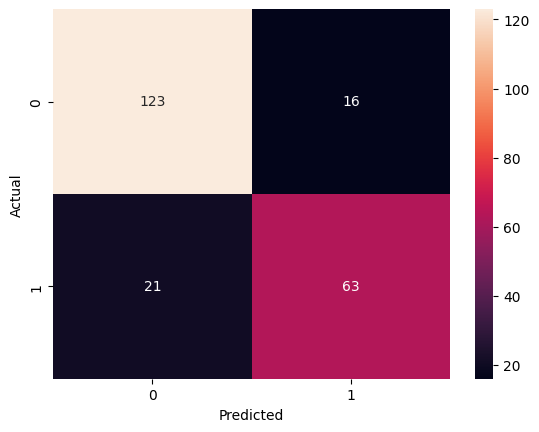

Precision :  0.797
Recall/TPR/Sensitivity :  0.75


In [50]:
train_test_evaluate_model(RandomForestClassifier(criterion='gini',min_samples_leaf = 1, min_samples_split=12,
                                                 n_estimators= 700),"RandomForest")

# Decision Tree

In [51]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define models and parameters
model =  DecisionTreeClassifier()
grid={"criterion":['gini','entropy'],"max_depth" : [1,3,5,7,9,11,12],"max_features":["auto","log2","sqrt",None]}

grid_search = GridSearchCV(model,param_grid=grid,scoring='neg_mean_squared_error',cv=3,verbose=3,)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto;, score=-0.229 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto;, score=-0.341 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto;, score=-0.180 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2;, score=-0.372 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2;, score=-0.341 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2;, score=-0.365 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt;, score=-0.413 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt;, score=-0.341 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt;, score=-0.365 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=None;, score=-0.224 total time=   0.0

DecisionTree
Train Accuracy : 0.835
Test Accuracy : 0.821
Confusion Matrix of Test data:


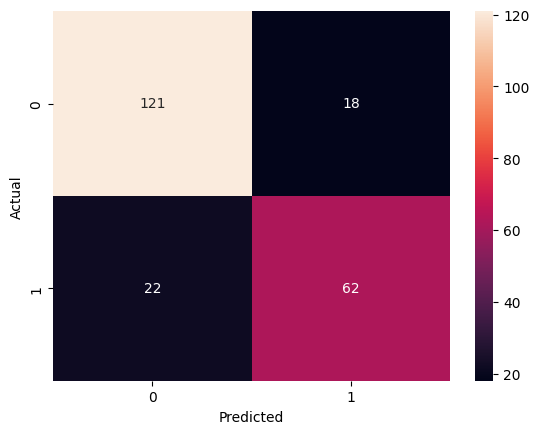

Precision :  0.775
Recall/TPR/Sensitivity :  0.738


In [52]:
train_test_evaluate_model(DecisionTreeClassifier(criterion = 'entropy',max_depth=3,max_features=None),"DecisionTree")

# Gaussian Naive Bayes

In [53]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# define models and parameters
model = GaussianNB()
# define grid search
grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(model, param_grid=grid, verbose=1, cv=10, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.04328761281083057)


GaussianNB
Train Accuracy : 0.817
Test Accuracy : 0.789
Confusion Matrix of Test data:


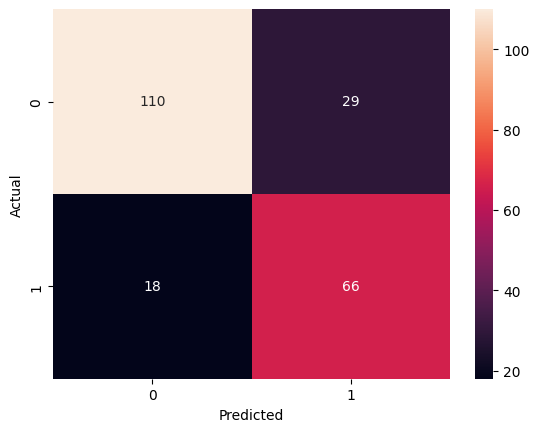

Precision :  0.695
Recall/TPR/Sensitivity :  0.786


In [54]:
train_test_evaluate_model(GaussianNB(var_smoothing=0.04328761281083057),"GaussianNB")

In [55]:
Result

,Name,train_accuracy,test_accuracy
0,LogisticRegression,0.831,0.789
1,KNN,0.841,0.807
2,RandomForest,0.864,0.834
3,DecisionTree,0.835,0.821
4,GaussianNB,0.817,0.789


# K-Fold Cross Validation

In [56]:
#Considering Random Forest model, as train and test accuracy are close and high
from sklearn.model_selection import cross_val_score
RFC = RandomForestClassifier(criterion='gini',min_samples_leaf = 1, min_samples_split=12, n_estimators= 700)
scores = cross_val_score(RFC, X, y, cv=10, scoring = "accuracy")
print("Scores:", np.round(scores,3))
print("Mean:", round(scores.mean(),3))
print("Standard Deviation:", round(scores.std(),3))

Scores: [0.8   0.865 0.708 0.876 0.876 0.82  0.831 0.775 0.843 0.831]
Mean: 0.823
Standard Deviation: 0.049
